In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

0 in the dataset means either the radiation was below the sensor's detection limit as in night radiation is very low.
0 in cloud cover means clear sky, 100 means completely overcast sky.


In [62]:
dataset = pd.read_csv('cleaned_solar_dataset_v2.csv')
Q1 = dataset["generated_power_kw"].quantile(0.25)
Q3 = dataset["generated_power_kw"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = np.clip(dataset, lower_bound, upper_bound)

X = dataset[["total_cloud_cover_sfc","shortwave_radiation_backwards_sfc","angle_of_incidence", "zenith"]]

y = dataset["generated_power_kw"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train,columns=["total_cloud_cover_sfc","shortwave_radiation_backwards_sfc","Angle_of_incidence", "Zenith"])


In [64]:
X_test = pd.DataFrame(X_test,columns=["total_cloud_cover_sfc","shortwave_radiation_backwards_sfc","Angle_of_incidence", "Zenith"])
train_data = X_train.copy()
train_data["generated_power_kw"] = y_train.values

In [65]:
test_data = X_test.copy()
test_data["generated_power_kw"] = y_test.values

train_data.to_csv("train_dataset_v2.csv", index=False)
test_data.to_csv("test_dataset_v2.csv", index=False)

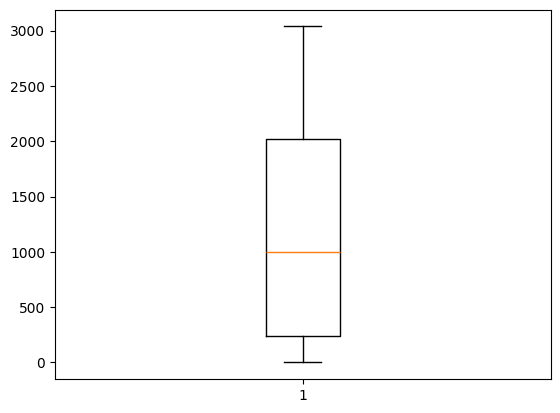

In [66]:
import matplotlib.pyplot as plt
plt.boxplot(train_data["generated_power_kw"])
plt.show()